In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [28]:
def hawks_ratio(p, V, C):
  return p * (p - 1) * (p - V/C)

def run_one_episode(V, C, draw=False):
  tmax = 100
  dt = 0.01
  t_list = np.arange(0, tmax, dt)

  p0 = 0.001
  p_list = [p0]

  p = p0
  for t in t_list[1:]:
    pp = p + hawks_ratio(p, V, C) * dt
    p_list.append(pp)
    p = pp

  if draw == True:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t_list, p_list)
  
  return (V, C, p_list[-1])

In [29]:
V_array = np.linspace(1, 5, 10)
C_array = np.linspace(1, 10, 10)

Vs = []
Cs = []
values = [] # (V, C, hawks_ratio)が入る
for V, C in itertools.product(V_array, C_array):
  ans = run_one_episode(V,C)
  values.append(ans)
  Vs.append(V)
  Cs.append(C)

hawks_ratio = [val[2] for val in values]


10
10
100


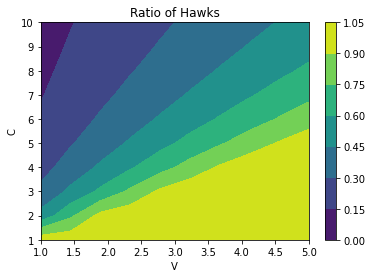

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
x, y = np.meshgrid(np.unique(Vs), np.unique(Cs))
print(len(x))
print(len(y))
print(len(hawks_ratio))

z = griddata((Vs, Cs), hawks_ratio, (x, y))
cont = ax.contourf(x, y, z)
fig.colorbar(cont)
ax.set_title('Ratio of Hawks')
ax.set_xlabel('V')
ax.set_ylabel('C')
# ax.set_zlabel('hawks_ratio')
fig.savefig('tmp2.png', dpi=600)